In [1]:
%pylab inline
from numpy.linalg import norm

Populating the interactive namespace from numpy and matplotlib


In [2]:
def L_exp(N,spectral_radius,r, T = 1000, T_set= 500):
    W = np.random.rand(N,N) *2 -1
    radius = np.max(np.abs(np.linalg.eigvals(W)))
    W = W * spectral_radius / radius
    x = np.random.rand(N)


    #S = 10*np.load('data/mackey_glass_t17.npy')

    #print x
    for t in range(T_set):
        a = np.dot(W,x )
        x = 1*a/norm(a)
        #plt.plot(x[0],x[1],'.')
        #print x
    plt.show()

    l = 0
    for t in range(T):
        a = np.dot(W,x)
        x = 1*a/norm(a)
        #plt.plot(x[0],x[1],'.')
        J = W/norm(a) *(1-np.outer(a,a)/(norm(a)**2))
        l += np.log(np.sort(np.abs(np.linalg.eigvals(J)))[::-1]) / T
        
    return l

def mult_exp(sr = 10, reps = 10, N = 500, r = 1):
    L = []
    for _ in range(reps):
        l =L_exp(N, spectral_radius=sr, r = r)
        #print l[:4]
        L.append(l[0])
    
    return np.mean(L), np.std(L)

In [3]:
sr_range = np.arange(1,10,0.5)
mean = []
sd = []
for sr in sr_range:
    print sr
    m,s = mult_exp(sr=sr)
    
    mean.append(m)
    sd.append(s)

mean = np.array(mean)
sd = np.array(sd)


1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5


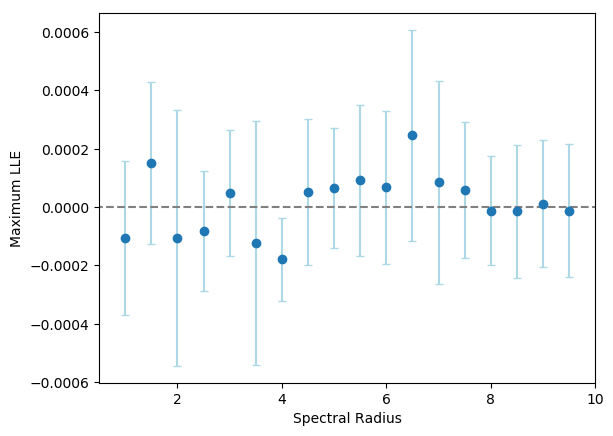

In [42]:
mean = np.array(mean)
sd = np.array(sd)
plt.style.use('default')
fig, ax1 = plt.subplots(
        #figsize = (15,8)
)


ax1.set_xlabel("Spectral Radius")
ax1.set_ylabel("Maximum LLE")
#ax1.plot(sr_range, mean, 'b', label = 'lle')
#ax1.fill_between(sr_range, mean - sd ,mean + sd, color='b', alpha=0.2 )
ax1.plot(range(0,11), np.zeros(11), "--", color = 'grey')

ax1.errorbar(sr_range, mean, yerr=sd, fmt='o', ecolor = 'lightblue', capsize=3)
ax1.set_xlim(0.5,10)

plt.savefig("LLE.pdf", format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.05)

In [142]:
m, s = mult_exp()

print m+s, m-s

0.0005519897436483202 -0.0007378372650903166


0.0005955849031523964

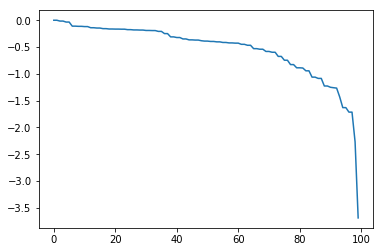

In [133]:
N = 100
spectral_radius = 20
r = 1

l = L_exp(N, spectral_radius, r)

#print l/T
plt.show()

plt.plot(l/T)

In [106]:
L4 = l/T

Text(0,0.5,u'Lyapunov exponent')

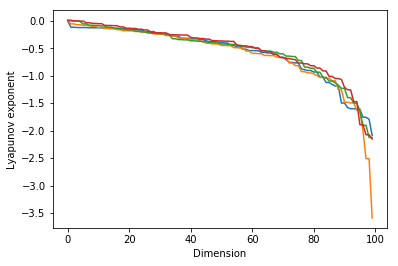

In [121]:
plt.plot(L1)
plt.plot(L2)
plt.plot(L3)
plt.plot(L4)

plt.xlabel("Dimension")
plt.ylabel("Lyapunov exponent")

In [13]:
L2

NameError: name 'L2' is not defined